In [ ]:
import os
import cv2
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dict = {'pixels':[],'labels':[],'type':[]}
folder= r'drive/MyDrive/project/data'

In [ ]:
for dtype in os.listdir(folder):
  path1 = os.path.join(folder,dtype)
  for expression in os.listdir(path1):
    path2 = os.path.join(path1,expression)
    for x in os.listdir(path2):
      imagepath = os.path.join(path2,x)
      image = cv2.imread(imagepath,0)
      image = image.reshape(48,48,1)

      dict['pixels'].append(image)
      dict['labels'].append(expression)
      dict['type'].append(dtype)
  
df = pd.DataFrame(dict)
df.head()

,pixels,labels,type
0,"[[[64], [62], [64], [65], [62], [63], [65], [6...",angry,test
1,"[[[121], [139], [145], [130], [129], [132], [1...",angry,test
2,"[[[67], [65], [59], [60], [42], [16], [4], [6]...",angry,test
3,"[[[92], [93], [90], [85], [207], [237], [226],...",angry,test
4,"[[[173], [170], [160], [142], [118], [86], [25...",angry,test


In [ ]:
df.shape

(35887, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35887 entries, 0 to 35886
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   pixels  35887 non-null  object
 1   labels  35887 non-null  object
 2   type    35887 non-null  object
dtypes: object(3)
memory usage: 841.2+ KB


In [ ]:
df.type.value_counts()

train    28709
test      7178
Name: type, dtype: int64

In [ ]:
train_data = df[df['type']=='train']
test_data = df[df['type']=='test']

In [ ]:
print(train_data.shape)
print(test_data.shape)

(28709, 3)
(7178, 3)


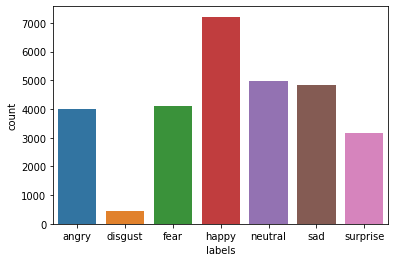

In [ ]:
sns.countplot(train_data['labels'])

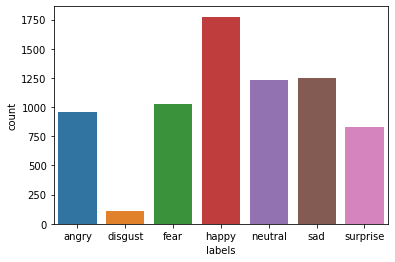

In [ ]:
sns.countplot(test_data['labels'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

train_data['labels'] = le.fit_transform(train_data['labels'])
test_data['labels'] = le.transform(test_data['labels'])

In [ ]:
le.classes_

array(['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise'],
      dtype=object)

In [ ]:
x_train = train_data['pixels']
y_train = train_data['labels']
x_test = test_data['pixels']
y_test = test_data['labels']

In [ ]:
x_train = np.array(list(x_train))
y_train = np.array(list(y_train))
x_test = np.array(list(x_test))
y_test = np.array(list(y_test))

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

#Model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization

In [ ]:
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau

In [ ]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 4
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected Block 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected Block 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

model.compile(optimizer=Adam(lr=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


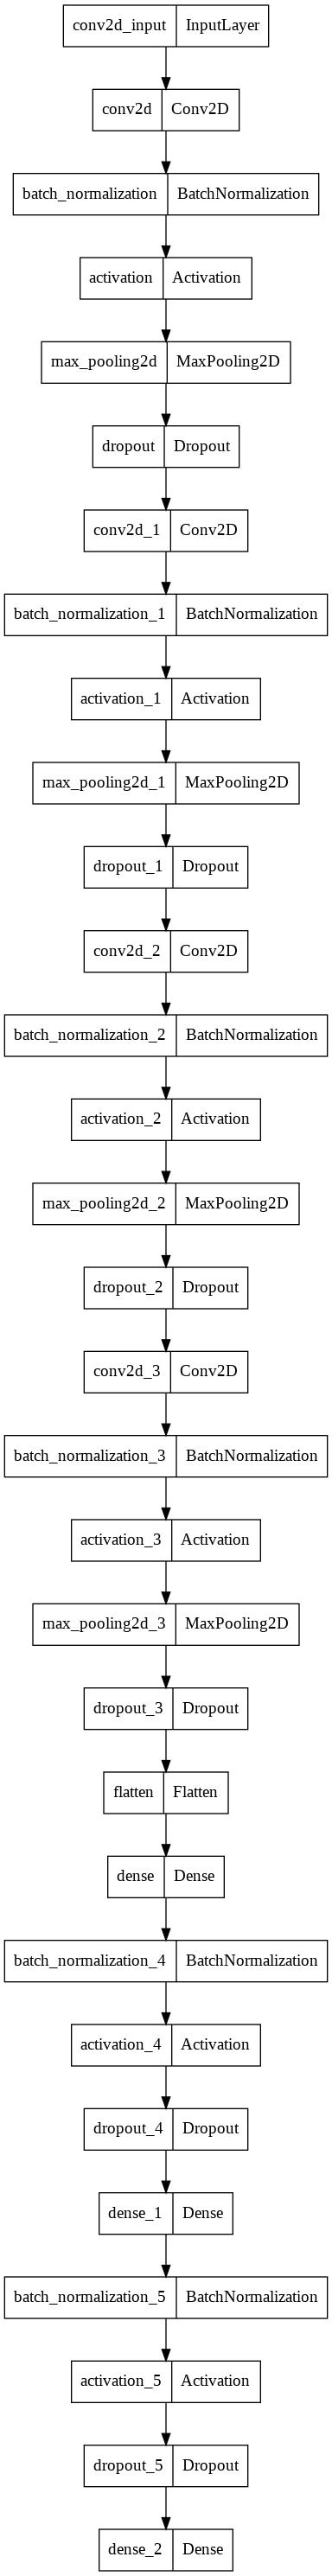

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.jpeg')

In [ ]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss' , factor=0.1, patience=2, min_lr=0.00001,model='auto')

In [ ]:
history = model.fit(x_train,y_train,epochs=100,callbacks= [reduce_lr],validation_data=(x_test,y_test))

Epoch 1/100
898/898 [==============================] - 20s 19ms/step - loss: 1.7931 - accuracy: 0.3003 - val_loss: 1.6480 - val_accuracy: 0.3638 - lr: 0.0100
Epoch 2/100
898/898 [==============================] - 16s 18ms/step - loss: 1.4328 - accuracy: 0.4475 - val_loss: 1.6152 - val_accuracy: 0.3383 - lr: 0.0100
Epoch 3/100
898/898 [==============================] - 16s 18ms/step - loss: 1.3087 - accuracy: 0.5017 - val_loss: 1.3761 - val_accuracy: 0.4710 - lr: 0.0100
Epoch 4/100
898/898 [==============================] - 16s 18ms/step - loss: 1.2362 - accuracy: 0.5336 - val_loss: 1.5178 - val_accuracy: 0.4241 - lr: 0.0100
Epoch 5/100
898/898 [==============================] - 16s 18ms/step - loss: 1.1786 - accuracy: 0.5552 - val_loss: 1.3021 - val_accuracy: 0.5178 - lr: 0.0100
Epoch 6/100
898/898 [==============================] - 16s 18ms/step - loss: 1.1424 - accuracy: 0.5734 - val_loss: 1.2656 - val_accuracy: 0.5063 - lr: 0.0100
Epoch 7/100
898/898 [==============================]

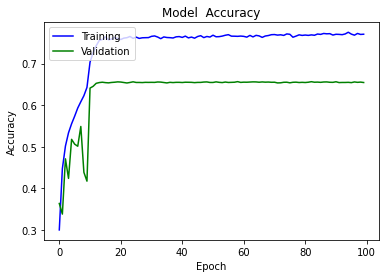

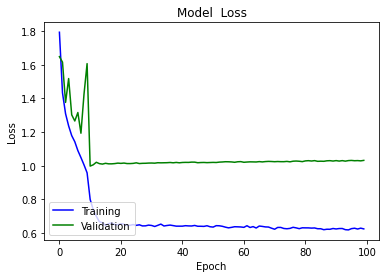

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'], color='b', label='Training')
plt.plot(history.history['val_accuracy'], color='g', label='Validation')
plt.title('Model  Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

plt.figure()
plt.plot(history.history['loss'], color='b', label='Training')
plt.plot(history.history['val_loss'], color='g', label='Validation')
plt.title('Model  Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='lower left')
plt.show()

In [ ]:
train_loss, train_acc = model.evaluate(x_train,y_train)
test_loss, test_acc   = model.evaluate(x_test,y_test)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

225/225 [==============================] - 1s 6ms/step - loss: 1.0315 - accuracy: 0.6544
final train accuracy = 86.23 , validation accuracy = 65.44


In [ ]:
model.save('drive/MyDrive/project/emotion.h5')